In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')
pd.options.display.float_format = '{:.3f}'.format

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

## Research Questions

- Verify if all column variables are unique.
- Verify and abnormalities in dataset (eg., Nan, blanks, inf., -, or any other unnecessary symbols).
- Check if the training dataset is balanced. 
- Investigate correlation among independent variables. 
- Investigate variable importance among independent variables, disgarding any irrevelant independent variables. 

In [2]:
samsung_test_data = pd.read_csv('C:\\Users\\david\Desktop\\thinkful datasets\\test.csv')
samsung_train_data = pd.read_csv('C:\\Users\\david\Desktop\\thinkful datasets\\train.csv')


In [3]:
#30% of data

samsung_test_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257,-0.023,-0.015,-0.938,-0.920,-0.668,-0.953,-0.925,-0.674,-0.894,...,-0.706,0.006,0.163,-0.826,0.271,-0.720,0.277,-0.058,2,STANDING
1,0.286,-0.013,-0.119,-0.975,-0.967,-0.945,-0.987,-0.968,-0.946,-0.894,...,-0.595,-0.083,0.017,-0.434,0.921,-0.698,0.281,-0.084,2,STANDING
2,0.275,-0.026,-0.118,-0.994,-0.970,-0.963,-0.994,-0.971,-0.963,-0.939,...,-0.641,-0.035,0.202,0.064,0.145,-0.703,0.280,-0.079,2,STANDING
3,0.270,-0.033,-0.118,-0.995,-0.973,-0.967,-0.995,-0.974,-0.969,-0.939,...,-0.736,-0.017,0.154,0.340,0.296,-0.699,0.284,-0.077,2,STANDING
4,0.275,-0.028,-0.130,-0.994,-0.967,-0.978,-0.994,-0.966,-0.977,-0.939,...,-0.847,-0.002,-0.040,0.737,-0.119,-0.692,0.291,-0.074,2,STANDING


In [4]:
samsung_test_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000,2947.000,2947.000,2947.000,2947.000,2947.000,2947.000,2947.000,2947.000,2947.000,...,2947.000,2947.000,2947.000,2947.000,2947.000,2947.000,2947.000,2947.000,2947.000,2947.000
mean,0.274,-0.018,-0.108,-0.614,-0.508,-0.634,-0.641,-0.523,-0.637,-0.462,...,-0.278,-0.599,0.005,0.004,0.040,-0.017,-0.514,0.075,-0.049,12.986
std,0.061,0.026,0.043,0.413,0.494,0.363,0.385,0.480,0.358,0.524,...,0.317,0.311,0.336,0.445,0.635,0.501,0.509,0.324,0.241,6.951
min,-0.592,-0.363,-0.576,-1.000,-1.000,-0.999,-0.999,-1.000,-0.999,-0.952,...,-1.000,-1.000,-1.000,-0.993,-0.999,-0.991,-0.984,-0.914,-0.949,2.000
25%,0.262,-0.025,-0.121,-0.991,-0.974,-0.976,-0.992,-0.974,-0.975,-0.934,...,-0.517,-0.830,-0.131,-0.283,-0.519,-0.428,-0.830,0.022,-0.098,9.000
50%,0.277,-0.017,-0.108,-0.931,-0.791,-0.828,-0.938,-0.800,-0.817,-0.853,...,-0.311,-0.684,0.005,0.007,0.047,-0.027,-0.730,0.182,-0.011,12.000
75%,0.288,-0.010,-0.097,-0.267,-0.106,-0.311,-0.322,-0.133,-0.323,-0.010,...,-0.084,-0.458,0.146,0.288,0.622,0.394,-0.546,0.260,0.092,18.000
max,0.672,0.246,0.494,0.465,1.000,0.490,0.440,1.000,0.428,0.786,...,1.000,1.000,0.999,0.986,1.000,1.000,0.833,1.000,0.973,24.000


In [5]:
print('Shape of the test data {}'.format(samsung_test_data.shape))
print('Shape of the Train data {}'.format(samsung_train_data.shape))


Shape of the test data (2947, 563)
Shape of the Train data (7352, 563)


In [6]:
samsung_train_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.289,-0.020,-0.133,-0.995,-0.983,-0.914,-0.995,-0.983,-0.924,-0.935,...,-0.710,-0.113,0.030,-0.465,-0.018,-0.841,0.180,-0.059,1,STANDING
1,0.278,-0.016,-0.124,-0.998,-0.975,-0.960,-0.999,-0.975,-0.958,-0.943,...,-0.861,0.053,-0.007,-0.733,0.704,-0.845,0.180,-0.054,1,STANDING
2,0.280,-0.019,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,-0.939,...,-0.760,-0.119,0.178,0.101,0.809,-0.849,0.181,-0.049,1,STANDING
3,0.279,-0.026,-0.123,-0.996,-0.983,-0.991,-0.997,-0.983,-0.989,-0.939,...,-0.483,-0.037,-0.013,0.640,-0.485,-0.849,0.182,-0.048,1,STANDING
4,0.277,-0.017,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,-0.942,...,-0.699,0.123,0.123,0.694,-0.616,-0.848,0.185,-0.044,1,STANDING


In [7]:
#for column in samsung_train_data.columns:
 #   print(column)

In [8]:
#Inspecting the number of columns and rows in the dataset
samsung_train_data.shape

(7352, 563)

In [9]:
#Checking for duplicate columns
len(set(samsung_train_data.columns))

563

In [10]:
set(samsung_train_data.columns.symmetric_difference(samsung_test_data.columns))

set()

In [11]:
set(samsung_train_data.columns).symmetric_difference(set(samsung_test_data.columns))

set()

In [12]:
# Counting nulls in the dataset 
null_count = samsung_train_data.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

The inspection returned zero duplicate columns and no null values

In [13]:
#for column in samsung_train_data.columns:
#    print(column)



In [14]:
samsung_train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [15]:
mean_cols = [x for x in samsung_test_data.columns[samsung_test_data.columns.str.contains('Mean')]]

mean2_cols = [x for x in samsung_test_data.columns[samsung_test_data.columns.str.contains('mean')]]



In [16]:
#mean_cols

In [17]:
#mean2_cols

In [18]:
#samsung_train_data['fBodyAcc-max()-Y'].value_counts(dropna=False)

In [19]:
samsung_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [20]:
np.dtype(samsung_train_data['subject'])


dtype('int64')

In [21]:
np.dtype(samsung_train_data['Activity'])


dtype('O')

In [22]:
#samsung_train_data.dtypes

In [23]:
np.unique(samsung_train_data['Activity'])

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [24]:
#Training variables with subject dropped and the outcome variable removed
#X Values
samsung_train_data.drop(['subject','Activity'], 1).head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.289,-0.020,-0.133,-0.995,-0.983,-0.914,-0.995,-0.983,-0.924,-0.935,...,-0.074,-0.299,-0.710,-0.113,0.030,-0.465,-0.018,-0.841,0.180,-0.059
1,0.278,-0.016,-0.124,-0.998,-0.975,-0.960,-0.999,-0.975,-0.958,-0.943,...,0.158,-0.595,-0.861,0.053,-0.007,-0.733,0.704,-0.845,0.180,-0.054
2,0.280,-0.019,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,-0.939,...,0.415,-0.391,-0.760,-0.119,0.178,0.101,0.809,-0.849,0.181,-0.049
3,0.279,-0.026,-0.123,-0.996,-0.983,-0.991,-0.997,-0.983,-0.989,-0.939,...,0.405,-0.117,-0.483,-0.037,-0.013,0.640,-0.485,-0.849,0.182,-0.048
4,0.277,-0.017,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,-0.942,...,0.088,-0.351,-0.699,0.123,0.123,0.694,-0.616,-0.848,0.185,-0.044


In [25]:
#Activity will be the y value 
#The X Values will be used to predict what activity the user is doing. 
samsung_train_data['Activity'].head()
y_train = samsung_train_data['Activity']

In [26]:
#Activity will be the y value 
#The X Values will be used to predict what activity the user is doing. 
samsung_train_data['Activity'].head()
X_train = samsung_train_data.drop(['subject','Activity'], 1)


In [27]:
#Test variables with subject dropped and the outcome variable removed

#X Values

X_test = samsung_test_data.drop(['subject','Activity'], 1)

samsung_test_data.drop(['subject','Activity'], 1).head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257,-0.023,-0.015,-0.938,-0.920,-0.668,-0.953,-0.925,-0.674,-0.894,...,0.072,-0.330,-0.706,0.006,0.163,-0.826,0.271,-0.720,0.277,-0.058
1,0.286,-0.013,-0.119,-0.975,-0.967,-0.945,-0.987,-0.968,-0.946,-0.894,...,-0.401,-0.122,-0.595,-0.083,0.017,-0.434,0.921,-0.698,0.281,-0.084
2,0.275,-0.026,-0.118,-0.994,-0.970,-0.963,-0.994,-0.971,-0.963,-0.939,...,0.063,-0.190,-0.641,-0.035,0.202,0.064,0.145,-0.703,0.280,-0.079
3,0.270,-0.033,-0.118,-0.995,-0.973,-0.967,-0.995,-0.974,-0.969,-0.939,...,0.117,-0.344,-0.736,-0.017,0.154,0.340,0.296,-0.699,0.284,-0.077
4,0.275,-0.028,-0.130,-0.994,-0.967,-0.978,-0.994,-0.966,-0.977,-0.939,...,-0.122,-0.535,-0.847,-0.002,-0.040,0.737,-0.119,-0.692,0.291,-0.074


In [28]:
#the y values will be tested against the training set

#Activity will be the y value 

#The X Values will be used to predict what activity the user is doing. 
y_test = samsung_test_data['Activity']

### Check the Data for Balance

In [29]:
samsung_train_data['Activity'].value_counts()/ len(samsung_train_data)

LAYING               0.191
STANDING             0.187
SITTING              0.175
WALKING              0.167
WALKING_UPSTAIRS     0.146
WALKING_DOWNSTAIRS   0.134
Name: Activity, dtype: float64

In [30]:
from sklearn.metrics import classification_report


rfc1 = ensemble.RandomForestClassifier()
rfc1.fit(X_train,y_train)
cv1 = cross_val_score(rfc1, X_train, y_train, cv=5)

y_true, y_pred = y_test, rfc1.predict(X_test)
print(classification_report(y_true, y_pred))

print(cv1)
print("mean = {:.3}".format(cv1.mean()))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.86      0.87       491
          STANDING       0.87      0.90      0.89       532
           WALKING       0.83      0.96      0.89       496
WALKING_DOWNSTAIRS       0.94      0.81      0.87       420
  WALKING_UPSTAIRS       0.88      0.85      0.87       471

       avg / total       0.90      0.90      0.90      2947

[0.89348711 0.89938817 0.88911565 0.90810075 0.93324251]
mean = 0.905


In [32]:
#from sklearn.metrics import classification_report


rfc1 = ensemble.RandomForestClassifier()
rfc1.fit(X_train,y_train)
rfc_score1 = cross_val_score(rfc1, X_train, y_train, cv=5)
print('\nEach Cross Validated R2 score: \n', rfc_score1)
print("\nOverall Random Forest Classifier R2: %0.2f (+/- %0.2f)\n" % (rfc_score1.mean(), rfc_score1.std() * 2))


Each Cross Validated R2 score: 
 [0.90909091 0.88511217 0.88367347 0.9012934  0.92915531]

Overall Random Forest Classifier R2: 0.90 (+/- 0.03)



In [33]:

rfc2 = ensemble.RandomForestClassifier(n_estimators=15)
rfc2.fit(X_train,y_train)
rfc_score2 = cross_val_score(rfc2, X_train, y_train, cv=5)
print('\nEach Cross Validated R2 score: \n', rfc_score2)
print("\nOverall Random Forest Classifier R2: %0.2f (+/- %0.2f)\n" % (rfc_score2.mean(), rfc_score2.std() * 2))


Each Cross Validated R2 score: 
 [0.9036635  0.89530931 0.92517007 0.90605854 0.94209809]

Overall Random Forest Classifier R2: 0.91 (+/- 0.03)



## Variable Importance

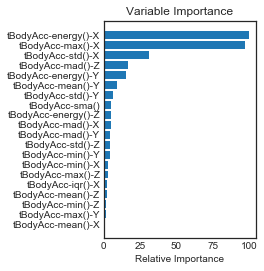

In [34]:
#These are the top 15 features most important to the random forest classifier
feature_importance = rfc1.feature_importances_[:20]

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Gradient Boosting Classifier

In [35]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

#train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
#train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

#test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
#test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

#print((
 #   'Training set accuracy:\n'
  #  'Percent Type I errors: {}\n'
   # 'Percent Type II errors: {}\n\n'
    #'Test set accuracy:\n'
    #'Percent Type I errors: {}\n'
    #'Percent Type II errors: {}'
#).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


In [36]:
#print("Training Type I and Type II Errors")
#print(table_train)
#print("Testing Type I and Type II Errors")
#print(table_test)

In [40]:
clf_score = cross_val_score(clf, X_train, y_train, cv=5)
print('\nEach Cross Validated R2 score: \n', clf_score)
print("\nOverall Gradient Boosted Classifier R2: %0.2f (+/- %0.2f)\n" % (clf_score.mean(), clf_score.std() * 2))


Each Cross Validated R2 score: 
 [0.91451832 0.9082257  0.93537415 0.94281824 0.94277929]

Overall Gradient Boosted Classifier R2: 0.93 (+/- 0.03)



In [42]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[537,   0,   0,   0,   0,   0],
       [  0, 421,  70,   0,   0,   0],
       [  0,  51, 480,   0,   0,   1],
       [  0,   0,   0, 474,  11,  11],
       [  0,   0,   0,  38, 340,  42],
       [  0,   0,   0,  59,  11, 401]], dtype=int64)

In [ ]:
confusion_matrix(y_true, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
# Final prediction score
#print('Final prediction score: [%.3f]' % r2_score(y_test, y_pred))

confusion_matrix(y_true, y_pred)

In [ ]:
#FIND AND DROP UNIMPORTANT VARIABLES 
#PREPARE A TABLE 
#TRAINING AND TESTING PERFORMANCE
#DROP ON TRAINING AND TEST